<a href="https://colab.research.google.com/github/Soundar586/DMI/blob/main/House_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (1).csv


In [40]:
# Load the uploaded CSV file
df = pd.read_csv("data.csv")
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [48]:
# Select relevant columns from the dataset
df = df[['sqft_living', 'bedrooms', 'bathrooms', 'price']]
df.dropna(inplace=True)  # Clean missing values
df.head()


,sqft_living,bedrooms,bathrooms,price
0,1340,3.0,1.50,313000.0
1,3650,5.0,2.50,2384000.0
2,1930,3.0,2.00,342000.0
3,2000,3.0,2.25,420000.0
4,1940,4.0,2.50,550000.0


In [42]:
# Define input features (X) and output (y)
X = df[['sqft_living', 'bedrooms', 'bathrooms']]
y = df['price']


In [43]:
# Split into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [45]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [46]:
# Evaluate the model using error metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 991204834716.4655
R² Score: 0.028084138016367333


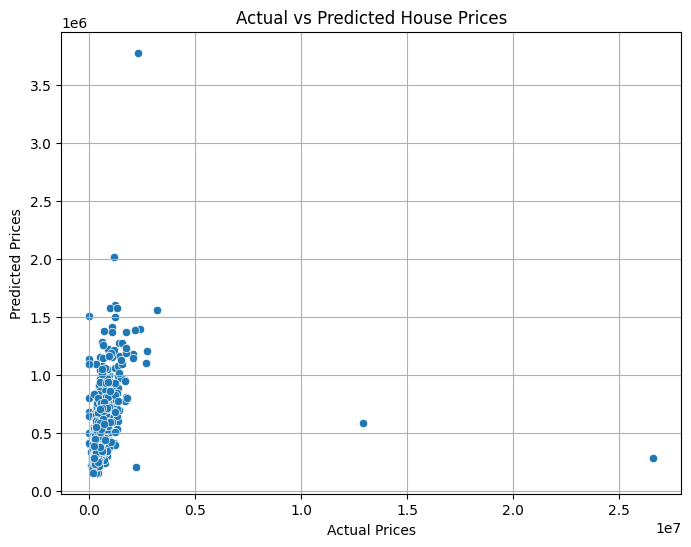

In [47]:
# Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
